<a href="https://colab.research.google.com/github/cod3astro/leetcode_and_hackerrank/blob/main/loan_payback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv', index_col='id')
target = train['loan_paid_back']
train.drop(columns=['loan_paid_back'], inplace=True)
train['is_train'] = 1 # Mark training data

test = pd.read_csv('test.csv', index_col='id')
test['is_train'] = 0 # Mark test data

df = pd.concat([train, test])
df.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,is_train
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,1
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1


In [4]:
df.shape

(848563, 12)

In [5]:
df.isnull().any().any()

np.False_

In [7]:
df.describe(include='all')

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,is_train
count,848563.000000,848563.000000,848563.000000,848563.000000,848563.000000,848563,848563,848563,848563,848563,848563,848563.000000
unique,NaN,NaN,NaN,NaN,NaN,3,4,5,5,8,30,NaN
top,NaN,NaN,NaN,NaN,NaN,Female,Single,Bachelor's,Employed,Debt consolidation,C3,NaN
freq,NaN,NaN,NaN,NaN,NaN,437655,412529,399530,643852,463658,84105,NaN
mean,48218.466144,0.120662,680.952514,15019.234385,12.355139,NaN,NaN,NaN,NaN,NaN,NaN,0.700000
std,26714.243232,0.068576,55.484775,6925.217352,2.011555,NaN,NaN,NaN,NaN,NaN,NaN,0.458258
min,6002.430000,0.011000,395.000000,500.050000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,27939.785000,0.072000,646.000000,10275.010000,10.990000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,46552.600000,0.096000,682.000000,15000.220000,12.370000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,61003.900000,0.156000,719.000000,18851.520000,13.680000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns
skewness = df[numerical_cols].skew().sort_values(ascending=False)

print("Skewness of numerical features:\n")
print(skewness)


Skewness of numerical features:

annual_income           1.719969
debt_to_income_ratio    1.410672
loan_amount             0.206873
interest_rate           0.047951
credit_score           -0.168397
is_train               -0.872872
dtype: float64


Let's visualize the distribution of the top 5 most skewed numerical features to better understand their skewness.

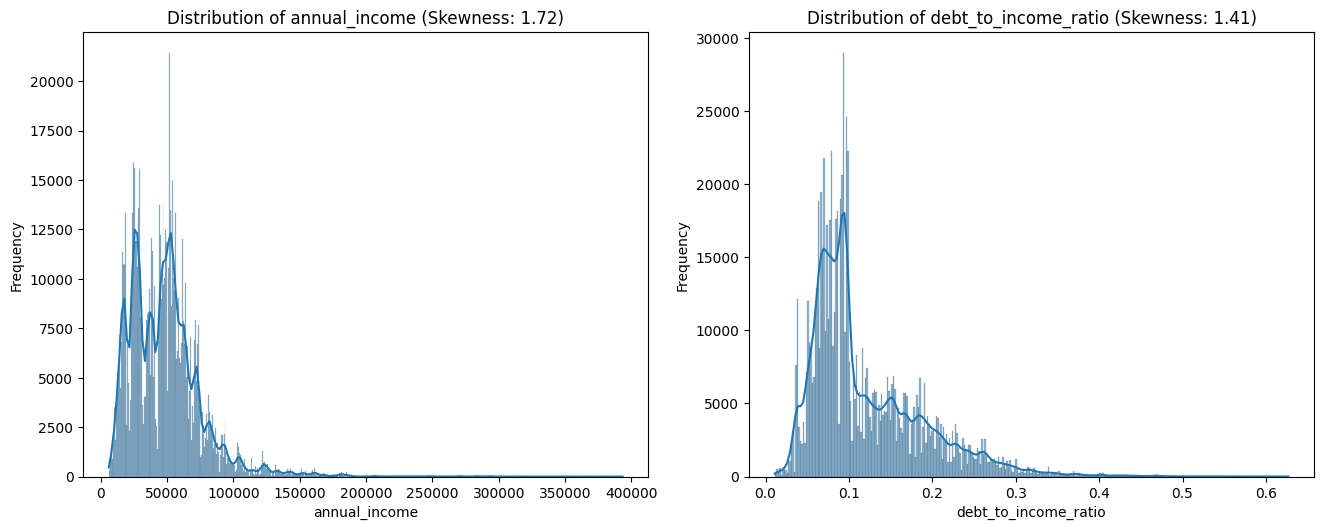

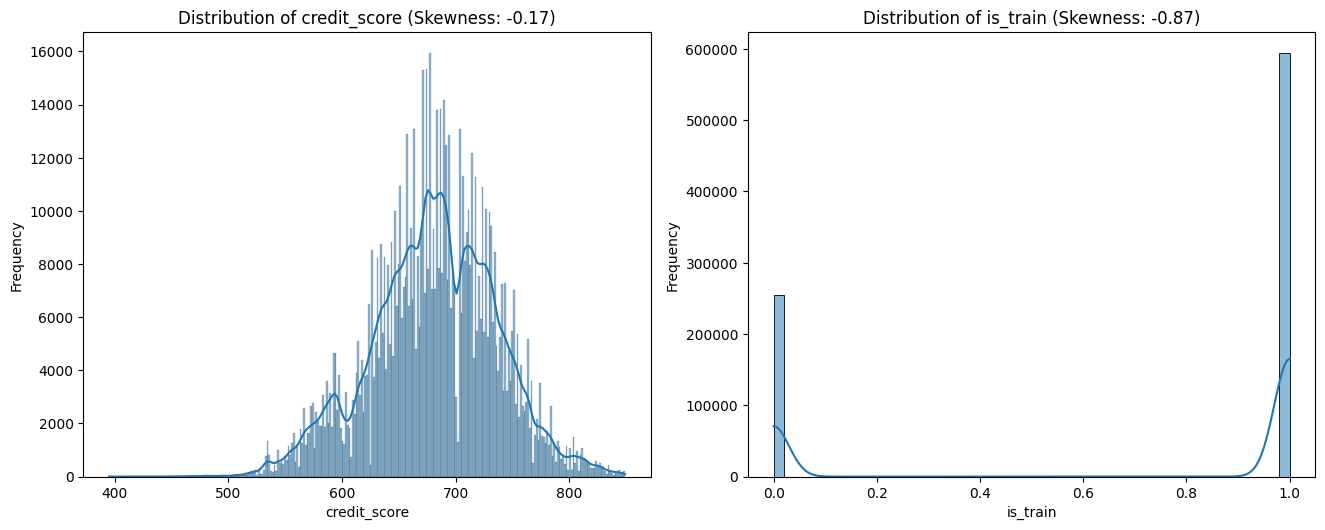

In [12]:
top_skewed_features = skewness.head(2).index
bottom_skewed_features = skewness.tail(2).index

def plot_skewness(columns):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(columns):
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} (Skewness: {skewness[col]:.2f})')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
plot_skewness(columns=top_skewed_features)
plot_skewness(columns=bottom_skewed_features)

In [13]:
for col in ['annual_income', 'debt_to_income_ratio']:
    df[col] = np.log1p(df[col])
    print(f'Transformed skewness of {col}: {df[col].skew():.2f}')


Transformed skewness of annual_income: -0.34
Transformed skewness of debt_to_income_ratio: 1.22


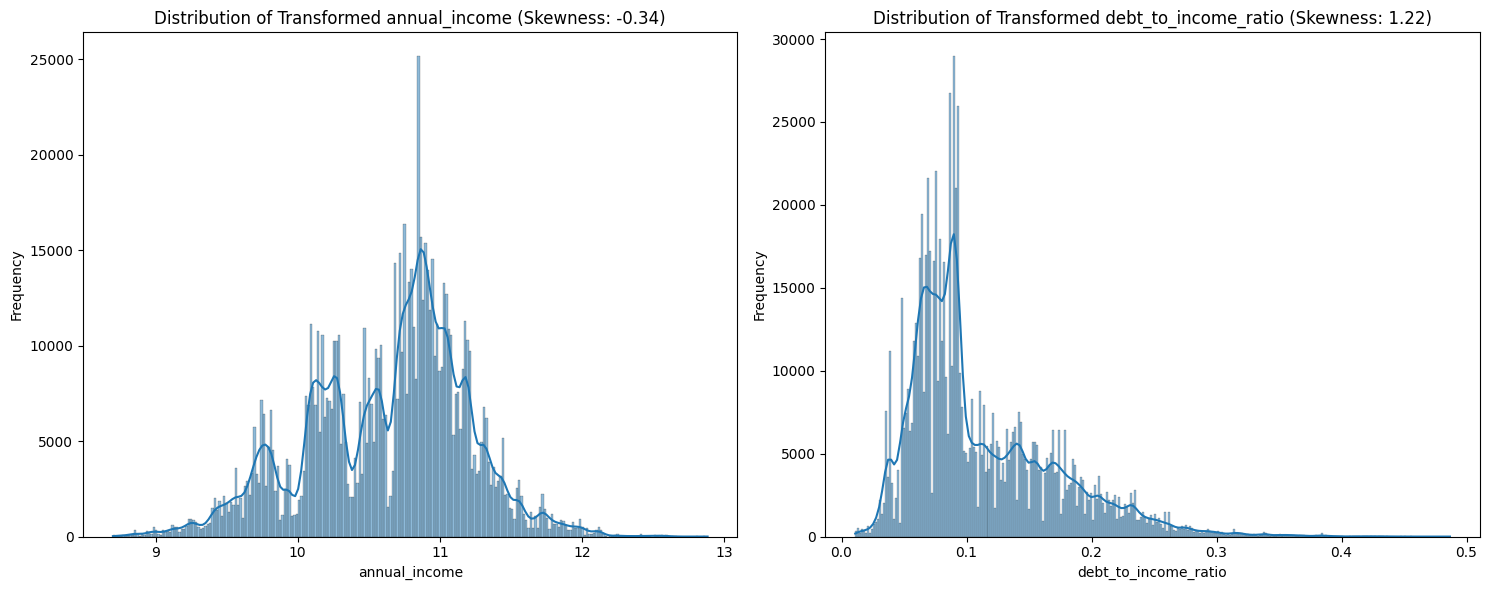

In [14]:
transformed_features = ['annual_income', 'debt_to_income_ratio']

plt.figure(figsize=(15, 6))
for i, col in enumerate(transformed_features):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of Transformed {col} (Skewness: {df[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [15]:
# Reload df to revert previous transformations on 'debt_to_income_ratio'
train = pd.read_csv('train.csv', index_col='id')
train.drop(columns=['loan_paid_back'], inplace=True)
train['is_train'] = 1

test = pd.read_csv('test.csv', index_col='id')
test['is_train'] = 0

df = pd.concat([train, test])

# Apply log1p transformation to 'annual_income' (which worked well)
df['annual_income'] = np.log1p(df['annual_income'])
print(f"Transformed skewness of annual_income (log1p): {df['annual_income'].skew():.2f}")

# Apply square root transformation to 'debt_to_income_ratio'
df['debt_to_income_ratio'] = np.sqrt(df['debt_to_income_ratio'])
print(f"Transformed skewness of debt_to_income_ratio (sqrt): {df['debt_to_income_ratio'].skew():.2f}")

Transformed skewness of annual_income (log1p): -0.34
Transformed skewness of debt_to_income_ratio (sqrt): 0.76


Now, let's visualize the distributions of both transformed features again to assess the effect of the square root transformation on `debt_to_income_ratio`.

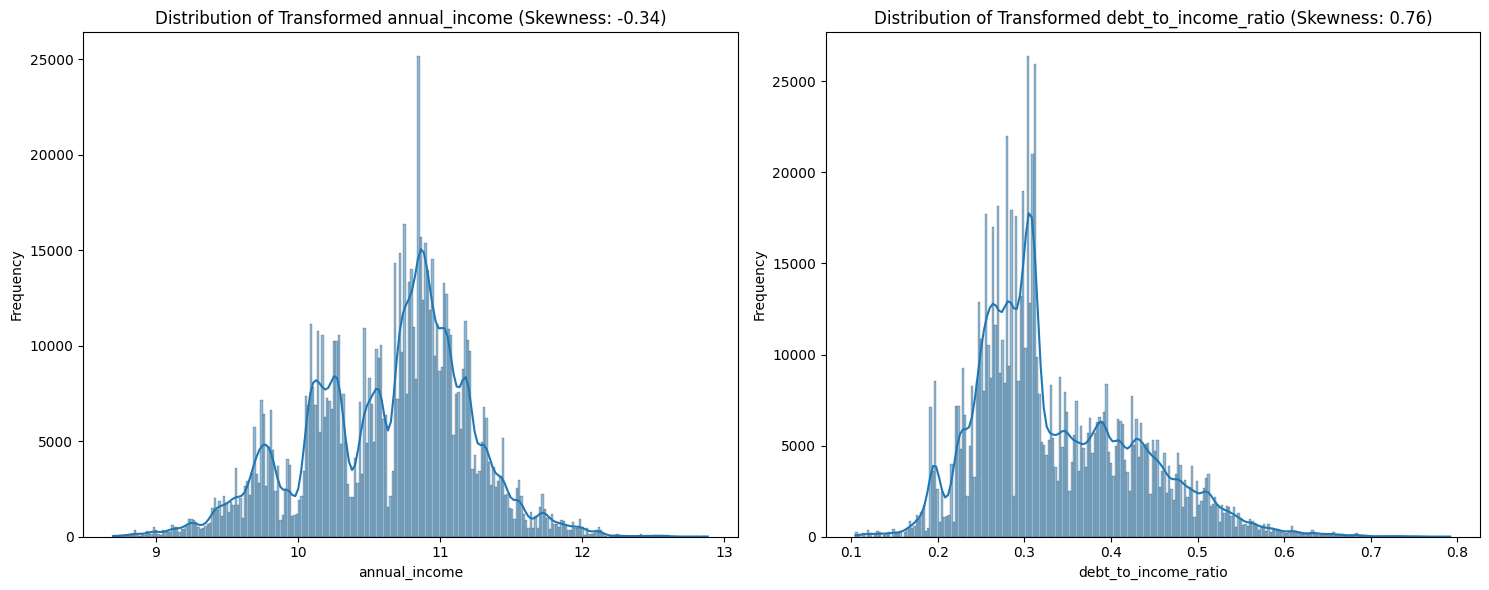

In [16]:
transformed_features = ['annual_income', 'debt_to_income_ratio']

plt.figure(figsize=(15, 6))
for i, col in enumerate(transformed_features):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of Transformed {col} (Skewness: {df[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()